#Activity 1


##1.1 Surface plot of the Probability Density Function (PDF) of the 2D Gaussian

mean $\mu=\left(2,1\right)^\top$ and covariance
$\Sigma = \left[\begin{array}{cc} 1 & -1 \\ -1 & 1.5\end{array}\right]$.

The PDF of a $d$ dimensional  multivariate Gaussian distribution is given by
$$
p(x| \mu, \Sigma) = \frac{1}{\sqrt{(2\pi)^d |\Sigma|}} \exp \left ({-\frac{1}{2}(x - \mu)^\top \Sigma^{-1} (x - \mu)} \right) 
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import multivariate_normal

def gaussian2D(X1,X2,mu,sigma):
    tensor = np.empty(np.shape(X1) + (2,)) #creates an 100x100x2 tensor for X1 and X2
    tensor[:, :, 0] = X1
    tensor[:, :, 1] = X2
    d = np.shape(mu)[0] #2 dimensional gaussian PDF
    denPart = 1 / np.sqrt(((2 * np.pi) ** d) * (np.linalg.det(sigma))) 
    sigmaInv = np.linalg.inv(sigma)
    subtract = tensor - mu

    #first operation computes the matrixial multiplication
    #of (x-mu) and sigma^-1 
    #[i,j,:] @ [:,:] = [i,j,:]
    bracketMult1 = np.zeros_like(tensor) 
    for i in range(0, np.shape(X1)[0]):
        for j in range(0, np.shape(X1)[1]):
            bracketMult1[i, j, :] = subtract[i][j, :] @ sigmaInv

    #second operation computes the multiplication of every line of each tensor
    #of the first multiplication with every line of each tensor of (x-mu)
    #[i,j,:] @ [i,j,:] = [i,j]
    bracketMult2 = np.zeros((np.shape(X1)[0], np.shape(X1)[1]))
    for i in range(0, np.shape(X1)[0]):
        for j in range(0, np.shape(X1)[1]):
            bracketMult2[i, j] = bracketMult1[i][j, :] @ subtract[i][j, :]

    expPart = np.exp(-0.5 * bracketMult2) 
    vecP = denPart * expPart #the PDF vectorized

    return vecP

# Our 2-dimensional distribution will be over variables X1 and X2
N = 100
x1 = np.linspace(-3, 5, N)
x2 = np.linspace(-2, 4, N)
X1, X2 = np.meshgrid(x1, x2)

# Mean vector and covariance matrix
mu = np.array([2, 1])
Sigma = np.array([[1, -1], [-1, 1.5]])

Z = gaussian2D(X1,X2,mu,Sigma)
print(Z)

[[1.34526321e-34 7.27005941e-34 3.85266190e-33 ... 3.90446438e-03
  3.15529226e-03 2.50040271e-03]
 [3.53464744e-34 1.89157218e-33 9.92640470e-33 ... 3.96710796e-03
  3.17466765e-03 2.49123534e-03]
 [9.21922748e-34 4.88559507e-33 2.53882431e-32 ... 4.00125439e-03
  3.17078308e-03 2.46393441e-03]
 ...
 [9.32241297e-09 1.94819646e-08 3.99235730e-08 ... 2.55583570e-17
  7.98702004e-18 2.44753470e-18]
 [1.20115060e-08 2.48569589e-08 5.04418224e-08 ... 1.27343204e-17
  3.94070328e-18 1.19581484e-18]
 [1.53630052e-08 3.14827624e-08 6.32647397e-08 ... 6.29837048e-18
  1.93006656e-18 5.79974117e-19]]


###1.1.1 scipy.stats.multivariate_normal (built-in 2D gaussian PDF function)

Verifying the result of the proposed function in 1.1 with a pre-existing python function

In [ ]:
checkTensor = np.empty(X1.shape + (2,)) #creates the tensor
checkTensor[:, :, 0] = X1 #tensor[:,:,0]
checkTensor[:, :, 1] = X2 #tensor[:,:,1]
compute = multivariate_normal(mu, Sigma)
checkZ = compute.pdf(checkTensor)
print(checkZ)

[[1.34526321e-34 7.27005941e-34 3.85266190e-33 ... 3.90446438e-03
  3.15529226e-03 2.50040271e-03]
 [3.53464744e-34 1.89157218e-33 9.92640470e-33 ... 3.96710796e-03
  3.17466765e-03 2.49123534e-03]
 [9.21922748e-34 4.88559507e-33 2.53882431e-32 ... 4.00125439e-03
  3.17078308e-03 2.46393441e-03]
 ...
 [9.32241297e-09 1.94819646e-08 3.99235730e-08 ... 2.55583570e-17
  7.98702004e-18 2.44753470e-18]
 [1.20115060e-08 2.48569589e-08 5.04418224e-08 ... 1.27343204e-17
  3.94070328e-18 1.19581484e-18]
 [1.53630052e-08 3.14827624e-08 6.32647397e-08 ... 6.29837048e-18
  1.93006656e-18 5.79974117e-19]]


##1.2 Surface and Contour Plots

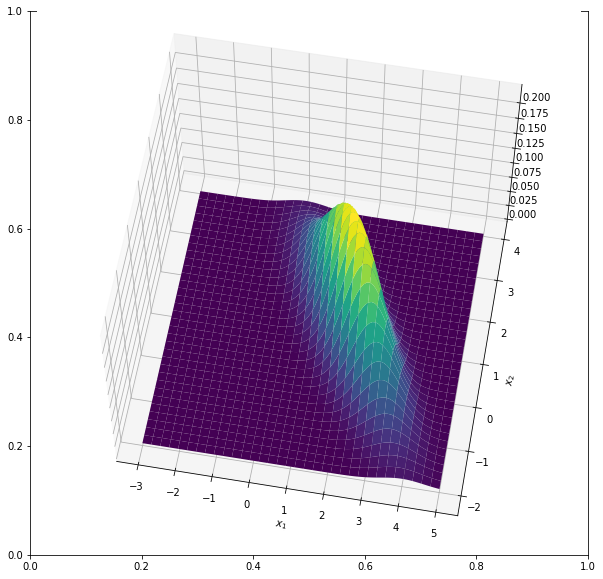

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.plot_surface(X1, X2, Z, rstride=3, cstride=3, cmap=cm.viridis)
ax.view_init(60,-80)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
plt.show()

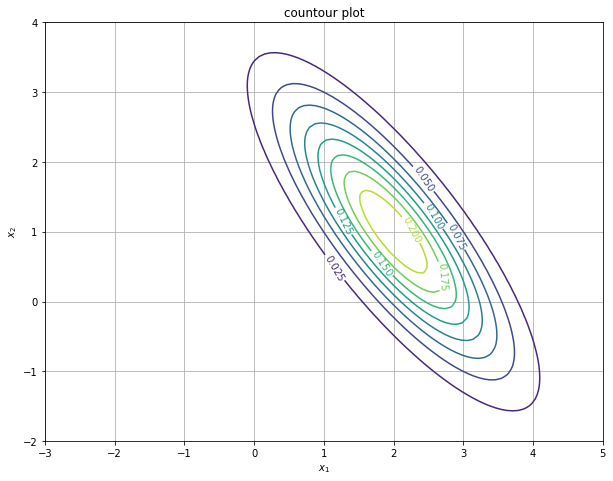

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
cs = ax.contour(X1, X2, Z, 10)
ax.clabel(cs, inline=True, fontsize=10)
ax.set_aspect('equal')
ax.set_title('countour plot')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
plt.grid()
plt.show()

#Activity 2

##2.1 Surface plot of $f(x) = \max \{p(x|\mu_1,\Sigma_1), p(x|\mu_2,\Sigma_2)\}$

where $p(x|\mu,\Sigma)$ is the Probability Density Function (PDF) of the 2D Gaussian distribution with mean $\mu$ and covariance
$\Sigma$, and

$\mu_1 =\left(2,1\right)^\top$; $\mu_2 =\left(-1,0\right)^\top$

$\Sigma_1 = \left[\begin{array}{cc} 1 & -1 \\ -1 & 1.5\end{array}\right]$; $\Sigma_2 = \left[\begin{array}{cc} 1 & 0.5 \\ 0.5 & 1\end{array}\right]$






In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def gaussian2D(X1,X2,mu,sigma):
    tensor = np.empty(np.shape(X1) + (2,)) #creates an 100x100x2 tensor for X1 and X2
    tensor[:, :, 0] = X1
    tensor[:, :, 1] = X2
    d = np.shape(mu)[0] #2 dimensional gaussian PDF
    denPart = 1 / np.sqrt(((2 * np.pi) ** d) * (np.linalg.det(sigma)))
    sigmaInv = np.linalg.inv(sigma)
    subtract = tensor - mu

    #first operation computes the matrixial multiplication
    #of (x-mu) and sigma^-1 
    #[i,j,:] @ [:,:] = [i,j,:]
    bracketMult1 = np.zeros_like(tensor)
    for i in range(0, np.shape(X1)[0]):
        for j in range(0, np.shape(X1)[1]):
            bracketMult1[i, j, :] = subtract[i][j, :] @ sigmaInv

    #second operation computes the multiplication of every line of each tensor
    #of the first multiplication with every line of each tensor of (x-mu)
    #[i,j,:] @ [i,j,:] = [i,j]
    bracketMult2 = np.zeros((np.shape(X1)[0], np.shape(X1)[1]))
    for i in range(0, np.shape(X1)[0]):
        for j in range(0, np.shape(X1)[1]):
            bracketMult2[i, j] = bracketMult1[i][j, :] @ subtract[i][j, :]

    expPart = np.exp(-0.5 * bracketMult2)
    vecP = denPart * expPart

    return vecP

def maxFunc(pdf1, pdf2):
    maxElems = np.zeros((np.shape(pdf1)[0],np.shape(pdf2)[1]))
    for i in range(np.shape(maxElems)[0]):
        for j in range(np.shape(maxElems)[1]):
            check1 = pdf1[i,j]
            check2 = pdf2[i,j]
            if check1 >= check2:
                maxElems[i,j] = check1
            else:
                maxElems[i,j] = check2

    return maxElems

# Our 2-dimensional distribution will be over variables X1 and X2
N = 100
x1 = np.linspace(-3, 5, N)
x2 = np.linspace(-2, 4, N)
X1, X2 = np.meshgrid(x1, x2)

# Mean vector and covariance matrix
#PDF 1
mu1 = np.array([2, 1])
Sigma1 = np.array([[1, -1], [-1, 1.5]])
#PDF 2
mu2 = np.array([-1, 0])
Sigma2 = np.array([[1, 0.5], [0.5, 1]])

Z1 = gaussian2D(X1,X2,mu1,Sigma1)
Z2 = gaussian2D(X1,X2,mu2,Sigma2)
F = maxFunc(Z1,Z2)
#print(F)

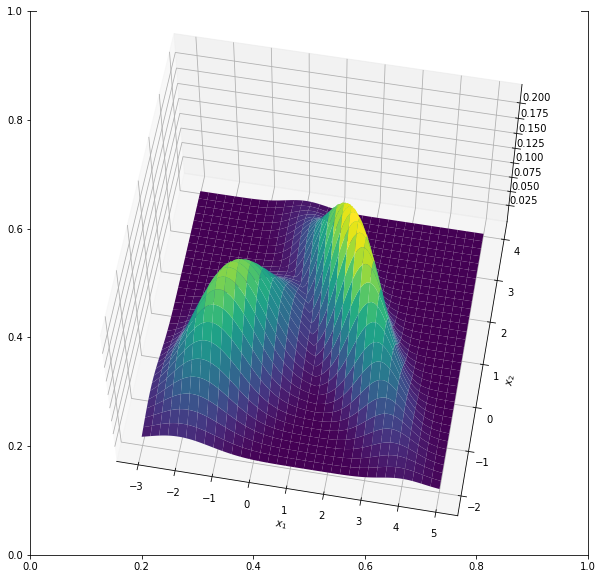

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.plot_surface(X1, X2, F, rstride=3, cstride=3, cmap=cm.viridis)
ax.view_init(60,-80)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
plt.show()

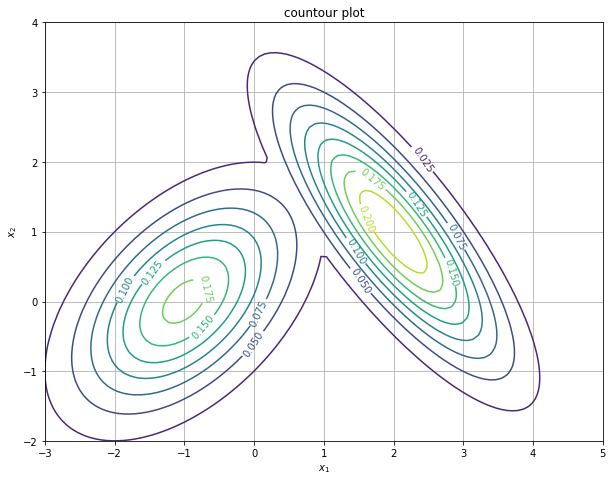

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
cs = ax.contour(X1, X2, F, 10)
ax.clabel(cs, inline=True, fontsize=10)
ax.set_aspect('equal')
ax.set_title('countour plot')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
plt.grid()
plt.show()

#Activity 3

##3.1 For each of the following functions $f:\mathbb{R}^2\rightarrow\mathbb{R}$ 

The origin $x=(0,0)^\top$ is a critical point, that is, the gradient at that point is zero? 
Check whether it is a minimum point, a maximum point or a saddle point.



In [ ]:
import sympy as sym
x1,x2 = sym.symbols('x1, x2')

### 3.1.1 $f(x)=x_1^2+2x_2^2-x_1 x_2$

In [ ]:
f1 = (x1**2) + 2*(x2**2) - x1*x2
#Computing the gradient
g1 = sym.zeros(2,1)
g1[0,0] = sym.diff(f1,x1)
g1[1,0]= sym.diff(f1,x2)
print(f'Gradient of f(x) = {g1}')
#gradient = 0: calculate the minima
sysSol = sym.solve(g1,x1,x2)
print(f'Points satisfying the necessary conditions: {sysSol}')
#Computing the Hessian
H1 = sym.zeros(2,2)
H1[0,0] = sym.diff(g1[0,0],x1)
H1[0,1] = sym.diff(g1[1,0],x1)
H1[1,0] = sym.diff(g1[0,0],x2)
H1[1,1] = sym.diff(g1[1,0],x2)
print(f'Hessian of f(x) = {H1}')
print(f'Determinant of the Hessian = {sym.det(H1)}')
print(f'Trace of the Hessian = {sym.trace(H1)}')

Gradient of f(x) = Matrix([[2*x1 - x2], [-x1 + 4*x2]])
Points satisfying the necessary conditions: {x1: 0, x2: 0}
Hessian of f(x) = Matrix([[2, -1], [-1, 4]])
Determinant of the Hessian = 7
Trace of the Hessian = 6


Since the gradient at $x=(0,0)^\top$ equals $(0,0)^\top$ \
det(H) > 0 and the trace of the Hessian > 0\
x is a minimun point.

###3.1.2 $f(x)=x_1^2+x_2^2-2x_1 x_2$


In [ ]:
f2 = (x1**2) + (x2**2) - 2*x1*x2
#Computing the gradient
g2 = sym.zeros(2,1)
g2[0,0] = sym.diff(f2,x1)
g2[1,0]= sym.diff(f2,x2)
print(f'Gradient of f(x) = {g2}')
#gradient = 0: calculate the minima
sysSol2 = sym.solve(g2,x1,x2)
print(f'Points satisfying the necessary conditions: {sysSol2}')
#Computing the Hessian
H2 = sym.zeros(2,2)
H2[0,0] = sym.diff(g2[0,0],x1)
H2[0,1] = sym.diff(g2[1,0],x1)
H2[1,0] = sym.diff(g2[0,0],x2)
H2[1,1] = sym.diff(g2[1,0],x2)
print(f'Hessian of f(x) = {H2}')
print(f'Determinant of the Hessian = {sym.det(H2)}')
print(f'Trace of the Hessian = {sym.trace(H2)}')

Gradient of f(x) = Matrix([[2*x1 - 2*x2], [-2*x1 + 2*x2]])
Points satisfying the necessary conditions: {x1: x2}
Hessian of f(x) = Matrix([[2, -2], [-2, 2]])
Determinant of the Hessian = 0
Trace of the Hessian = 4


Although $x=(0,0)^\top$ is a critical point (giving by the system solution that for any value x1=x2), det(H) = 0 which would imply the anwser is undetermined.

### 3.1.3 $f(x)=x_1^3-x_2^3$

In [ ]:
f3 = (x1**3) - (x2**3) 
#Computing the gradient
g3 = sym.zeros(2,1)
g3[0,0] = sym.diff(f3,x1)
g3[1,0]= sym.diff(f3,x2)
print(f'Gradient of f(x) = {g3}')
#gradient = 0: calculate the minima
sysSol3 = sym.solve(g3,x1,x2)
print(f'Points satisfying the necessary conditions: {sysSol3}')
#Computing the Hessian
H3 = sym.zeros(2,2)
H3[0,0] = sym.diff(g3[0,0],x1)
H3[0,1] = sym.diff(g3[1,0],x1)
H3[1,0] = sym.diff(g3[0,0],x2)
H3[1,1] = sym.diff(g3[1,0],x2)
print(f'Hessian of f(x) = {H3}')
print(f'Determinant of the Hessian = {sym.det(H3)}')
subsH = sym.det(H3).subs(x1,sysSol3[x1]).subs(x2,sysSol3[x2])
print(f'Determinant of the Hessian at x* = {subsH}')

Gradient of f(x) = Matrix([[3*x1**2], [-3*x2**2]])
Points satisfying the necessary conditions: {x1: 0, x2: 0}
Hessian of f(x) = Matrix([[6*x1, 0], [0, -6*x2]])
Determinant of the Hessian = -36*x1*x2
Determinant of the Hessian at x* = 0


Although  x=(0,0)⊤  is a critical point, det(H(f(x*))) = 0 which would imply the anwser is undetermined.

###3.1.4 $f(x)=-x_1^2+x_1 x_2-x_2^2$

In [ ]:
f4 = (-x1**2) + (x1*x2) - (x2**2) 
#Computing the gradient
g4 = sym.zeros(2,1)
g4[0,0] = sym.diff(f4,x1)
g4[1,0]= sym.diff(f4,x2)
print(f'Gradient of f(x) = {g4}')
#gradient = 0: calculate the minima
sysSol4 = sym.solve(g4,x1,x2)
print(f'Points satisfying the necessary conditions: {sysSol4}')
#Computing the Hessian
H4 = sym.zeros(2,2)
H4[0,0] = sym.diff(g4[0,0],x1)
H4[0,1] = sym.diff(g4[1,0],x1)
H4[1,0] = sym.diff(g4[0,0],x2)
H4[1,1] = sym.diff(g4[1,0],x2)
print(f'Hessian of f(x) = {H4}')
print(f'Determinant of the Hessian = {sym.det(H4)}')
print(f'Trace of the Hessian = {sym.trace(H4)}')

Gradient of f(x) = Matrix([[-2*x1 + x2], [x1 - 2*x2]])
Points satisfying the necessary conditions: {x1: 0, x2: 0}
Hessian of f(x) = Matrix([[-2, 1], [1, -2]])
Determinant of the Hessian = 3
Trace of the Hessian = -4


Since the gradient at  x=(0,0)⊤  equals  (0,0)⊤\
det(H) > 0 and the trace of the Hessian < 0 \
x is a maximum point.

#Activity 4
Consider the function $J:\mathbb{R}^2\rightarrow\mathbb{R}$, defined by 
$$
J(\theta) = \theta_1^2+\theta_2^2 + 3(\theta_1-1)^2+(\theta_2-1)^2 + \theta_1\theta_2
$$

##4.1 Grid Search

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def J_func(theta1,theta2):
  return (theta1**2) + (theta2**2) + 3*((theta1-1)**2) + ((theta2-1)**2)\
          + theta1*theta2

def gridSearch1(XMIN, XMAX, DX, YMIN, YMAX, DY): #updates the minimun each iteration
    theta1_min = 0
    theta2_min = 0
    J_min = float('inf')
    for theta1 in np.arange(XMIN, XMAX + DX, DX):
        for theta2 in np.arange(YMIN, YMAX + DY, DY):
            J = J_func(theta1, theta2) #calculates the function at the point
            if J < J_min: #updates the minimun value
                J_min = J
                theta1_min = theta1
                theta2_min = theta2

    return J_min, theta1_min, theta2_min

def gridSearch2(XMIN, XMAX, DX, YMIN, YMAX, DY): #calculates the mininum based on the J_func nxn matrix
    theta1 = np.arange(XMIN, XMAX + DX, DX)
    theta2 = np.arange(YMIN, YMAX + DY, DY)
    computeJ = np.zeros((np.shape(theta1)[0],np.shape(theta2)[0]))
    for i in range(0,np.shape(computeJ)[0]):
        for j in range(0,np.shape(computeJ)[1]):
            computeJ[i,j] = np.expand_dims(J_func(theta1[i],theta2[j]), axis=0)

    idxMin = np.unravel_index(np.argmin(computeJ), np.shape(computeJ)) #index of the minimum
    J_min = computeJ[idxMin[0], idxMin[1]] #value of the minimum
    theta1_min = theta1[idxMin[0]] #value of theta1 that satisfies the minimum
    theta2_min = theta2[idxMin[1]] #value of theta2 that satisfies the minimum

    return J_min, theta1_min, theta2_min, computeJ, idxMin

In [ ]:
XMIN = -3
XMAX = 3
DX = 0.01
YMIN = -3
YMAX = 3
DY = DX

J_min, theta1_min, theta2_min = gridSearch1(XMIN, XMAX, DX, YMIN, YMAX, DY)
print(f'min: {J_min} at ({theta1_min},{theta2_min})')
J_min2, theta1_min2, theta2_min2, testJ, idxMin = gridSearch2(XMIN, XMAX, DX, YMIN, YMAX, DY)
print(f'min: {J_min2} at ({theta1_min2},{theta2_min2})')

min: 1.5484000000000007 at (0.7099999999999209,0.31999999999992923)
min: 1.5484000000000007 at (0.7099999999999209,0.31999999999992923)


Text(0.5, 1.0, 'Cost function')

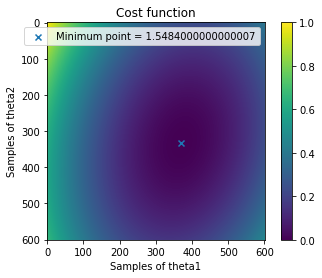

In [ ]:
leg = list()
plt.figure()
plt.imshow(np.transpose(testJ))
plt.scatter(idxMin[0],idxMin[1], marker='x')
leg.append(f"Minimum point = {J_min2}")
plt.legend(leg)
plt.colorbar()
plt.xlabel("Samples of theta1")
plt.ylabel("Samples of theta2")
plt.title("Cost function")

##4.2 Gradient Descent

###4.2.1 Analytical Solution

In [ ]:
import sympy as sym

theta1,theta2 = sym.symbols('theta1, theta2')

f1 = (theta1**2) + (theta2**2) + 3*((theta1-1)**2) + ((theta2-1)**2) + theta1*theta2
#Computing the gradient
g1 = sym.zeros(2,1)
g1[0,0] = sym.diff(f1,theta1)
g1[1,0]= sym.diff(f1,theta2)
print(f'Gradient of f(x) = {g1}')
#gradient = 0: calculate the minima
sysSol = sym.solve(g1,theta1,theta2)
print(f'Points satisfying the necessary conditions: {sysSol}')

Gradient of f(x) = Matrix([[8*theta1 + theta2 - 6], [theta1 + 4*theta2 - 2]])
Points satisfying the necessary conditions: {theta1: 22/31, theta2: 10/31}


$\frac{22}{31} \approx 0.7096774193548387$ \\
$\frac{10}{31} \approx 0.3225806451612903$ 

In [ ]:
#Computing the Hessian
H1 = sym.zeros(2,2)
H1[0,0] = sym.diff(g1[0,0],theta1)
H1[0,1] = sym.diff(g1[1,0],theta1)
H1[1,0] = sym.diff(g1[0,0],theta2)
H1[1,1] = sym.diff(g1[1,0],theta2)
print(f'Hessian of f(x) = {g1}')
print(f'Determinant of the Hessian = {sym.det(H1)}')
print(f'Trace of the Hessian = {sym.trace(H1)}')

Hessian of f(x) = Matrix([[8*theta1 + theta2 - 6], [theta1 + 4*theta2 - 2]])
Determinant of the Hessian = 31
Trace of the Hessian = 12


Which means $\theta = (\frac{22}{31},\frac{10}{31})^\top$ is a minimum point

In [ ]:
ans = f1.subs(theta1,22/31).subs(theta2,10/31)
print(f'Minimum value of the cost function = {ans}')

Minimum value of the cost function = 1.54838709677419


###4.2.2 Implementing the gradient descent method

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# cost function
def J_func(theta1, theta2):
    return (theta1 ** 2) + (theta2 ** 2) + 3 * ((theta1 - 1) ** 2) + ((theta2 - 1) ** 2) \
           + theta1 * theta2

# gradient
def J_grad(nVars, theta1, theta2):
    grad = np.zeros((nVars,1))
    grad[0,0] = (8*theta1) + theta2 - 6
    grad[1,0] = theta1 + (4*theta2) - 2
    return grad

def gradientDescent(gamma, maxIter, points, theta1_0, theta2_0):
    points[0] = [theta1_0, theta2_0]  # initial guess
    gradJ = np.zeros_like(points)
    costFunc = np.zeros((maxIter,1))
    for i in range(0, maxIter):
        costFunc[i,0] = J_func(points[i][0], points[i][1])
        print(i, points[i], costFunc[i,0])
        computeGrad = J_grad(numVar, points[i][0], points[i][1])
        for j in range(0, np.shape(gradJ)[1]):
            gradJ[i, j] = computeGrad[j, 0]
            points[i + 1][j] = points[i][j] - gamma * computeGrad[j, 0]

    return points, costFunc, gradJ

#number of variables
numVar = 2
# step size
gamma = 0.1
# number of iterations
MAX_ITER = 10
# collect points along iterations
points = np.zeros((MAX_ITER + 1, numVar))
# initial point
theta1_0, theta2_0 = 0, 0

# gradient descent method
points, cost, gradJ = gradientDescent(gamma, MAX_ITER, points, theta1_0, theta2_0)

0 [0. 0.] 4.0
1 [0.6 0.2] 1.6400000000000001
2 [0.7  0.26] 1.5572
3 [0.714 0.286] 1.5509799999999998
4 [0.7142 0.3002] 1.54936948
5 [0.71282 0.3087 ] 1.5487683236
6 [0.711694 0.313938] 1.548535325204
7 [0.710945  0.3171934] 1.54844473987012
8 [0.71046966 0.31922154] 1.5484095133104818
9 [0.71017178 0.32048596] 1.5483958142379741


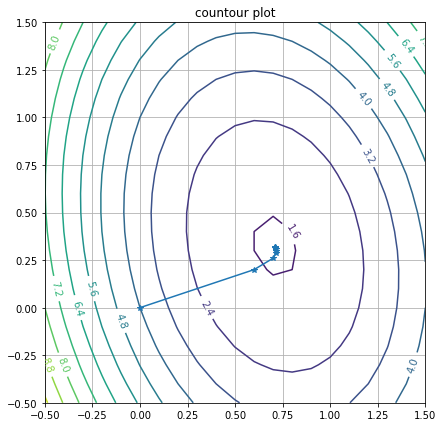

In [ ]:
# draw contour lines
MIN = -0.5
MAX = 1.5
STEP = 0.1
theta1 = np.arange(MIN,MAX+STEP,STEP)
theta2 = np.arange(MIN,MAX+STEP,STEP)
Theta1, Theta2 = np.meshgrid(theta1, theta2)
J = Theta1**2 + Theta2**2 +3*(Theta1-1)**2 + (Theta2-1)**2\
    + Theta1*Theta2

fig, ax = plt.subplots(figsize=(7,7))

cs = ax.contour(Theta1,Theta2,J,10)
ax.clabel(cs, inline=True, fontsize=10)
ax.set_aspect('equal')
ax.set_title('countour plot')
plt.grid()

# draw sequence of solutions
plt.plot(points[:,0],points[:,1],'-*')
plt.show()

###4.2.2.1 Gradient descent ++
Adaptive step. In each iteration, if the step is too large (resulting in a function increase) reduce it by a given factor (less than $1$) until the reduction in the value on function is obtained. Otherwise increase it by another factor while the function value still decreases.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# cost function
def J_func(theta1, theta2):
    return (theta1 ** 2) + (theta2 ** 2) + 3 * ((theta1 - 1) ** 2) + ((theta2 - 1) ** 2) \
           + theta1 * theta2

# gradient
def J_grad(nVars, theta1, theta2):
    grad = np.zeros((nVars,1))
    grad[0,0] = (8*theta1) + theta2 - 6
    grad[1,0] = theta1 + (4*theta2) - 2
    return grad

def gradientDescent(gamma, maxIter, points, theta1_0, theta2_0):
    points[0] = [theta1_0, theta2_0]  # initial guess
    gradJ = np.zeros_like(points)
    costFunc = np.zeros((maxIter,1))
    factorLow = 0.8
    factorHigh = 1.1
    for i in range(0, maxIter):
        costFunc[i,0] = J_func(points[i][0], points[i][1])
        
        if costFunc[i,0] >= costFunc[i-1,0]:
          gamma *= factorHigh
        else:
          gamma *= factorLow
        
        print(i, points[i], costFunc[i,0])
        computeGrad = J_grad(numVar, points[i][0], points[i][1])
        for j in range(0, np.shape(gradJ)[1]):
            gradJ[i, j] = computeGrad[j, 0]
            points[i + 1][j] = points[i][j] - gamma * computeGrad[j, 0]

    return points, costFunc, gradJ

#number of variables
numVar = 2
# step size
gamma = 0.1
# number of iterations
MAX_ITER = 10
# collect points along iterations
points = np.zeros((MAX_ITER + 1, numVar))
# initial point
theta1_0, theta2_0 = 0, 0

# gradient descent method
points, cost, gradJ = gradientDescent(gamma, MAX_ITER, points, theta1_0, theta2_0)

0 [0. 0.] 4.0
1 [0.66 0.22] 1.5844
2 [0.704   0.26048] 1.5565815807999999
3 [0.71156941 0.27836723] 1.5522274157894043
4 [0.71320705 0.28822107] 1.550676813736179
5 [0.71348291 0.29425446] 1.5499419741649276
6 [0.71340658 0.29820134] 1.5495405100262938
7 [0.71324931 0.3009058 ] 1.5493003082267758
8 [0.71309013 0.30282344] 1.5491469519258585
9 [0.71295089 0.30421893] 1.5490441579318865


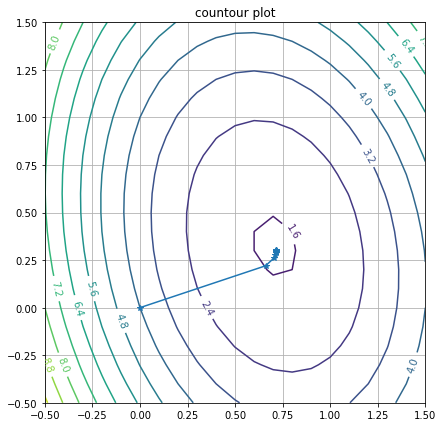

In [ ]:
# draw contour lines
MIN = -0.5
MAX = 1.5
STEP = 0.1
theta1 = np.arange(MIN,MAX+STEP,STEP)
theta2 = np.arange(MIN,MAX+STEP,STEP)
Theta1, Theta2 = np.meshgrid(theta1, theta2)
J = Theta1**2 + Theta2**2 +3*(Theta1-1)**2 + (Theta2-1)**2\
    + Theta1*Theta2

fig, ax = plt.subplots(figsize=(7,7))

cs = ax.contour(Theta1,Theta2,J,10)
ax.clabel(cs, inline=True, fontsize=10)
ax.set_aspect('equal')
ax.set_title('countour plot')
plt.grid()

# draw sequence of solutions
plt.plot(points[:,0],points[:,1],'-*')
plt.show()

#Activity 5
Repeat activity 4 with the function $J:\mathbb{R}^2\rightarrow\mathbb{R}$, defined by
$$J(x,y) = \frac{2(x^2+y^2)}{1+x^2+y^2} + 
\frac{(x-2)^2+(y-1)^2}{1+(x-2)^2+(y-1)^2}$$

##5.1 Grid Search

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def J_func(x, y):
    f1 = (2*((x**2)+(y**2)))/(1 + (x**2) + (y**2))
    f2 = (((x-2)**2) + ((y-1)**2))/(1 + ((x-2)**2) + ((y-2)**2))
    return f1 + f2

def gridSearch1(XMIN, XMAX, DX, YMIN, YMAX, DY): #updates the minimun each iteration
    x_min = 0
    y_min = 0
    J_min = float('inf')
    for x in np.arange(XMIN, XMAX + DX, DX):
        for y in np.arange(YMIN, YMAX + DY, DY):
            J = J_func(x, y) #calculates the function at the point
            if J < J_min: #updates the minimun value
                J_min = J
                x_min = x
                y_min = y

    return J_min, x_min, y_min

def gridSearch2(XMIN, XMAX, DX, YMIN, YMAX, DY): #calculates the mininum based on the J_func nxn matrix
    x = np.arange(XMIN, XMAX + DX, DX)
    y = np.arange(YMIN, YMAX + DY, DY)
    computeJ = np.zeros((np.shape(x)[0],np.shape(y)[0]))
    for i in range(0,np.shape(computeJ)[0]):
        for j in range(0,np.shape(computeJ)[1]):
            computeJ[i,j] = np.expand_dims(J_func(x[i],y[j]), axis=0)

    idxMin = np.unravel_index(np.argmin(computeJ), np.shape(computeJ)) #index of the minimum
    J_min = computeJ[idxMin[0], idxMin[1]] #value of the minimum
    x_min = x[idxMin[0]] #value of theta1 that satisfies the minimum
    y_min = y[idxMin[1]] #value of theta2 that satisfies the minimum

    return J_min, x_min, y_min, computeJ, idxMin

In [ ]:
XMIN = -3
XMAX = 3
DX = 0.01
YMIN = -3
YMAX = 3
DY = DX

J_min, x_min, y_min = gridSearch1(XMIN, XMAX, DX, YMIN, YMAX, DY)
print(f'min: {J_min} at ({x_min},{y_min})')
#J_min2, theta1_min2, theta2_min2, testJ, idxMin = gridSearch2(XMIN, XMAX, DX, YMIN, YMAX, DY)
#print(f'min: {J_min2} at ({theta1_min2},{theta2_min2})')

min: 0.5505690948450697 at (0.049999999999934985,-0.010000000000063736)


##5.2 Gradient Descent
Calculations to compute the gradient: https://drive.google.com/drive/folders/1cs30__Z2PcXl2vkiBwYogt5KYuk7POqQ?usp=sharing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# cost function
def J_func(x, y):
    f1 = (2*((x**2)+(y**2)))/(1 + (x**2) + (y**2))
    f2 = (((x-2)**2) + ((y-1)**2))/(1 + ((x-2)**2) + ((y-2)**2))
    return f1 + f2

# gradient
def J_grad(nVars, x, y):
    grad = np.zeros((nVars,1))
    #grad[0,0] = ((4*x)/(((x**2) + (y**2) + 1)**2)) - \
    #            ((4*(x-2)*(y-2))/(((x**2) - (4*x) + (y**2) - (4*y) + 9)**2))
    grad[0,0] = ((4*x)/(((x**2) + (y**2) + 1)**2)) + \
                ((2 * (x-2) * ((-2*y) + 4))/(((x**2) - (4*x) + (y**2) - (4*y) + 9)**2))
    grad[1,0] = ((4*y)/(((x**2) + (y**2) + 1)**2)) + \
                ((2*((x**2) - (4*x) - (y**2) + (4*y) + 1))/(((x**2) - (4*x) + (y**2) - (4*y) + 9)**2))
    return grad

def gradientDescent(gamma, maxIter, points, x_0, y_0):
    points[0] = [x_0, y_0]  # initial guess
    gradJ = np.zeros_like(points)
    costFunc = np.zeros((maxIter,1))
    for i in range(0, maxIter):
        costFunc[i,0] = J_func(points[i][0], points[i][1])
        print(i, points[i], costFunc[i,0])
        computeGrad = J_grad(numVar, points[i][0], points[i][1])
        for j in range(0, np.shape(gradJ)[1]):
            gradJ[i, j] = computeGrad[j, 0]
            points[i + 1][j] = points[i][j] - gamma * computeGrad[j, 0]

    return points, costFunc, gradJ

#number of variables
numVar = 2
# step size
gamma = 0.1
# number of iterations
MAX_ITER = 10
# collect points along iterations
points = np.zeros((MAX_ITER + 1, numVar))
# initial point
x_0, y_0 = -0.5, -0.5
# gradient descent method
points, cost, gradJ = gradientDescent(gamma, MAX_ITER, points, x_0, y_0)

0 [-0.5 -0.5] 1.2962962962962963
1 [-0.39739369 -0.4122085 ] 1.1098730034774795
2 [-0.2925896  -0.31986856] 0.9177117619114803
3 [-0.19394633 -0.2304915 ] 0.7528904445052063
4 [-0.11192114 -0.15443744] 0.6436560465186429
5 [-0.05240531 -0.09852739] 0.5881441643277197
6 [-0.01332489 -0.06182881] 0.5647847160837143
7 [ 0.01114184 -0.03914747] 0.5558162430094842
8 [ 0.02623086 -0.0254604 ] 0.5524793879811054
9 [ 0.03551634 -0.01726286] 0.551245784756645


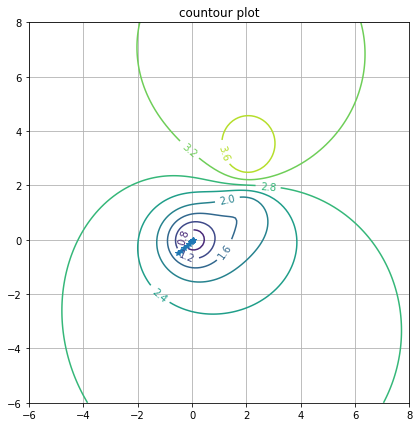

In [ ]:
# draw contour lines
MIN = -6
MAX = 8
STEP = 0.1
x = np.arange(MIN,MAX+STEP,STEP)
y = np.arange(MIN,MAX+STEP,STEP)
X, Y = np.meshgrid(x, y)
J = (2*((X**2)+(Y**2)))/(1 + (X**2) + (Y**2)) + \
    (((X-2)**2) + ((Y-1)**2))/(1 + ((X-2)**2) + ((Y-2)**2))

fig, ax = plt.subplots(figsize=(7,7))

cs = ax.contour(X,Y,J,10)
ax.clabel(cs, inline=True, fontsize=10)
ax.set_aspect('equal')
ax.set_title('countour plot')
plt.grid()

# draw sequence of solutions
plt.plot(points[:,0],points[:,1],'-*')
plt.show()